In [1]:
import pandas as pd

In [4]:
data = {
    'CustomerID': [1, 2, 3],
    'Name': ['John', 'Jane', 'Bob'],
    'Age': [25, 30, 35],
    'Address': ['123 Main St', '456 Oak St', '789 Pine St'],
    'AccountBalance': [1000, 1500, 2000],
    'LastLogin': ['2023-12-20', '2023-12-21', '2023-12-22'],
    'SuspiciousFlag': [0, 1, 0],
    'TransactionID': [101, 102, 103],
    'FraudIndicator': [0, 1, 0],
    'Category': ['Electronics', 'Clothing', 'Groceries'],
    'TransactionAmount': [500, 100, 200],
    'Amount': [500, 100, 200],
    'Timestamp': ['2023-12-20 12:00:00', '2023-12-21 14:30:00', '2023-12-22 16:45:00'],
    'MerchantID': [501, 502, 503],
    'AnomalyScore': [0.1, 0.9, 0.2],
    'MerchantName': ['ElectroShop', 'FashionMall', 'SuperMart'],
    'Location': ['CityA', 'CityB', 'CityC']
}

df = pd.DataFrame(data)

In [5]:
alerts = df[(df['SuspiciousFlag'] == 1) & (df['FraudIndicator'] == 1)]

In [6]:
print("Alerts:")
print(alerts)

Alerts:
   CustomerID  Name  Age     Address  AccountBalance   LastLogin  \
1           2  Jane   30  456 Oak St            1500  2023-12-21   

   SuspiciousFlag  TransactionID  FraudIndicator  Category  TransactionAmount  \
1               1            102               1  Clothing                100   

   Amount            Timestamp  MerchantID  AnomalyScore MerchantName Location  
1     100  2023-12-21 14:30:00         502           0.9  FashionMall    CityB  


In [7]:
import pandas as pd

In [8]:
file_path = 'data.csv'

In [9]:
df = pd.read_csv(file_path)

In [10]:
alerts = df[(df['SuspiciousFlag'] == 1) & (df['FraudIndicator'] == 1)]

In [11]:
alerts

,CustomerID,Name,Age,Address,AccountBalance,LastLogin,SuspiciousFlag,TransactionID,FraudIndicator,Category,TransactionAmount,Amount,Timestamp,MerchantID,AnomalyScore,MerchantName,Location
94,1095,Customer 1095,27,Address 1095,8403.773667,05-04-2022,1,95,1,Other,72.288141,50.395920,04-01-2022 22:00,2600,0.635150,Merchant 2095,Location 2095
329,1330,Customer 1330,63,Address 1330,8773.956940,26-11-2022,1,330,1,Food,47.671334,95.766922,14-01-2022 17:00,2838,0.066511,Merchant 2330,Location 2330


In [12]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('data.csv')

In [15]:
selected_columns = ['CustomerID', 'Age', 'AccountBalance', 'LastLogin', 'SuspiciousFlag', 'TransactionAmount', 'Amount', 'Timestamp', 'FraudIndicator']


In [16]:
selected_df = df[selected_columns]

In [17]:
selected_df = selected_df.dropna()

In [19]:
selected_df['Timestamp'] = pd.to_datetime(selected_df['Timestamp'], format="%d-%m-%Y %H:%M").astype('int64') // 10**9


In [20]:
fraud_data = selected_df[selected_df['FraudIndicator'] == 1]
non_fraud_data = selected_df[selected_df['FraudIndicator'] == 0]

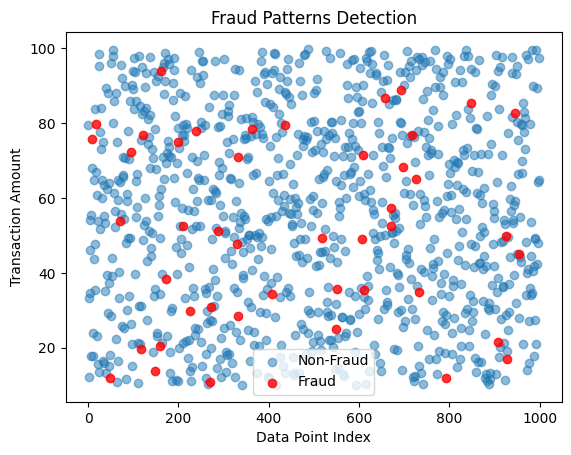

In [22]:
import matplotlib.pyplot as plt
plt.scatter(non_fraud_data.index, non_fraud_data['TransactionAmount'], label='Non-Fraud', alpha=0.5)
plt.scatter(fraud_data.index, fraud_data['TransactionAmount'], label='Fraud', color='red', alpha=0.8)
plt.xlabel('Data Point Index')
plt.ylabel('Transaction Amount')
plt.title('Fraud Patterns Detection')
plt.legend()
plt.show()